### Importação das bibliotecas necessárias

In [ ]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import seaborn as sns

In [8]:
import statsmodels.api as sm

In [9]:
import matplotlib.pyplot as plt

### Carregamento do ficheiro para análise

In [10]:
df = pd.read_csv('titanic_v2.csv')

### Informações iniciais relativas ao documento

In [11]:
df.shape

(891, 12)

In [12]:
df.head() # 5 primeiras linhas do Dataframe

,passenger,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df.info() # Informações gerais do dataframe, relativas ás variáveis (colunas), como o número de dados não nulos e o tipo.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   passenger  891 non-null    int64  
 1   survived   891 non-null    int64  
 2   pclass     891 non-null    int64  
 3   name       891 non-null    object 
 4   sex        891 non-null    object 
 5   age        714 non-null    float64
 6   sibsp      891 non-null    int64  
 7   parch      891 non-null    int64  
 8   ticket     891 non-null    object 
 9   fare       891 non-null    float64
 10  cabin      204 non-null    object 
 11  embarked   889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
df.duplicated().any() # Verificação se existem entradas duplicadas

False

### Tratamento dos dados

In [15]:
df2 = df.copy() # Criação de cópia do dataframe original para se tratar os dados.

##### Variável categórica: Idade ('age')

In [16]:
print(np.mean(df2['age'])) # Média de idades

29.69911764705882


In [17]:
print(np.median(df2['age'].dropna())) # Mediana de idades

28.0


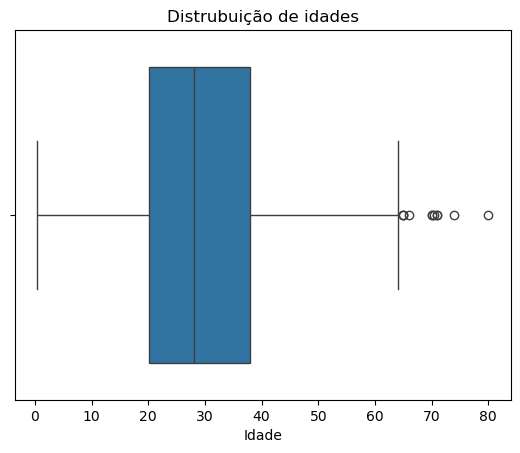

In [18]:
graf = sns.boxplot(df2, x= 'age') # Gráfico para análise da distribuição de idades.
graf.set_title('Distrubuição de idades')
graf.set_xlabel('Idade')
plt.show()

In [19]:
df2['age'] = df2['age'].fillna(df2['age'].mean()) # Tratamento dos dados nulos na coluna 'age' (idade).

##### Variável categórica: Sexo ('sex')

In [20]:
df2['male'] = df2.apply(lambda x: 1 if x['sex'] == 'male' else 0, axis=1) # Criação de coluna 'male' para substituir da coluna 'sex', tornando os dados numéricos (1 = male, 0 = female).

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   passenger  891 non-null    int64  
 1   survived   891 non-null    int64  
 2   pclass     891 non-null    int64  
 3   name       891 non-null    object 
 4   sex        891 non-null    object 
 5   age        891 non-null    float64
 6   sibsp      891 non-null    int64  
 7   parch      891 non-null    int64  
 8   ticket     891 non-null    object 
 9   fare       891 non-null    float64
 10  cabin      204 non-null    object 
 11  embarked   889 non-null    object 
 12  male       891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


##### Variável categórica: Local de embarque ('embarked')

In [22]:
df2.drop(['passenger', 'name', 'sex', 'ticket', 'cabin'], axis=1, inplace=True) # Eliminação do dataframe de colunas sem interesse.

In [23]:
# Eliminação de entradas com valores nulos (nesta altura apenas 2 valores nulos na coluna 'embarked')
df2.dropna(inplace=True)

In [24]:
# Criação de função para substituir o local de embarque por valor numérico, (1 -> 'C' (Cherbourg), 2 -> 'S' (Southampton) e 3 -> 'Q' (Queenstown)).
def local_embarque(local):
    if local == 'C':
        return 1
    elif local == 'S':
        return 2
    else:
        return 3

In [25]:
df2['embarked'] = df2['embarked'].apply(local_embarque) # Criação de nova coluna para substituição dos valores da coluna 'embarked'.

In [26]:
df2.info() # Informações após o tratamento inicial dos dados.

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  889 non-null    int64  
 1   pclass    889 non-null    int64  
 2   age       889 non-null    float64
 3   sibsp     889 non-null    int64  
 4   parch     889 non-null    int64  
 5   fare      889 non-null    float64
 6   embarked  889 non-null    int64  
 7   male      889 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 62.5 KB


##### Diminuição do tamanho dos dados

In [27]:
# Seleção das colunas com valores inteiros e decimais.
int_cols = df2.select_dtypes('integer').columns
float_cols = df2.select_dtypes('float').columns

In [28]:
# Diminuição do tamanho na memória dos valores.
df2[int_cols] = df2[int_cols].apply(pd.to_numeric, downcast='integer')
df2[float_cols] = df2[float_cols].apply(pd.to_numeric, downcast= 'float')

In [29]:
# Dataframe depois do tratamento completo dos valores, com a diminuição do tamanho do documento na memória para 19.1 KB.
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  889 non-null    int8   
 1   pclass    889 non-null    int8   
 2   age       889 non-null    float32
 3   sibsp     889 non-null    int8   
 4   parch     889 non-null    int8   
 5   fare      889 non-null    float32
 6   embarked  889 non-null    int8   
 7   male      889 non-null    int8   
dtypes: float32(2), int8(6)
memory usage: 19.1 KB


### Análise Descritiva de dados

In [30]:
# Estatísticas descritivas das variáveis
df2.describe()

,survived,pclass,age,sibsp,parch,fare,embarked,male
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.653446,0.524184,0.382452,32.096680,1.897638,0.649044
std,0.486260,0.834700,12.968364,1.103705,0.806761,49.697487,0.515181,0.477538
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,2.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,2.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,2.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329224,3.000000,1.000000


In [31]:
# Tabela de correlação inter-variável
df2.corr()

,survived,pclass,age,sibsp,parch,fare,embarked,male
survived,1.000000,-0.335549,-0.074673,-0.034040,0.083151,0.255290,-0.126753,-0.541585
pclass,-0.335549,1.000000,-0.327954,0.081656,0.016824,-0.548193,0.307324,0.127741
age,-0.074673,-0.327954,1.000000,-0.231875,-0.178232,0.088604,-0.032745,0.089434
sibsp,-0.034040,0.081656,-0.231875,1.000000,0.414542,0.160887,0.031095,-0.116348
parch,0.083151,0.016824,-0.178232,0.414542,1.000000,0.217532,-0.035756,-0.247508
fare,0.255290,-0.548193,0.088604,0.160887,0.217532,1.000000,-0.269588,-0.179958
embarked,-0.126753,0.307324,-0.032745,0.031095,-0.035756,-0.269588,1.000000,0.023175
male,-0.541585,0.127741,0.089434,-0.116348,-0.247508,-0.179958,0.023175,1.000000


In [32]:
# Seleção de colunas com as variáveis categóricas
colunas = df2.columns.drop(['survived', 'male', 'pclass', 'embarked'])

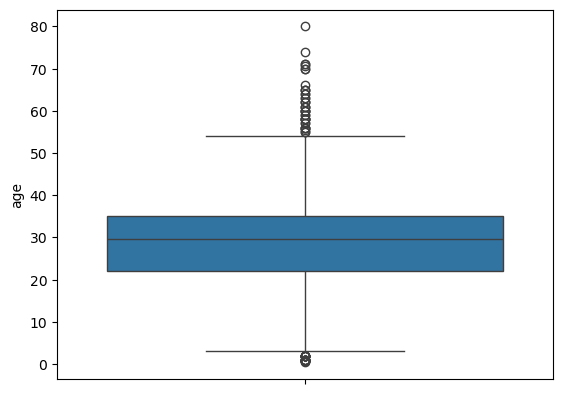

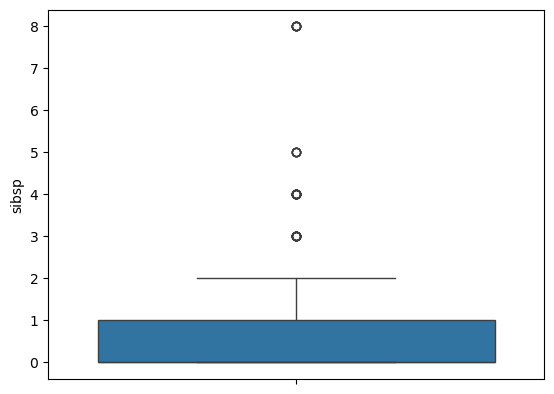

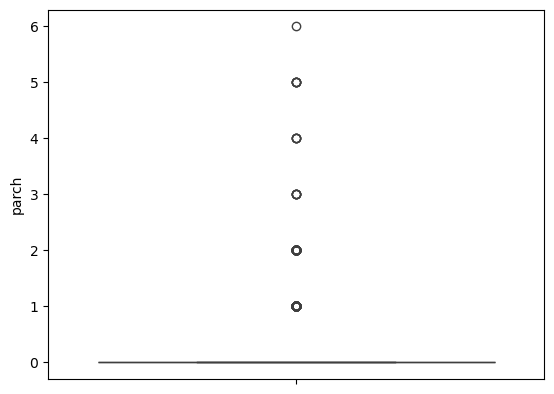

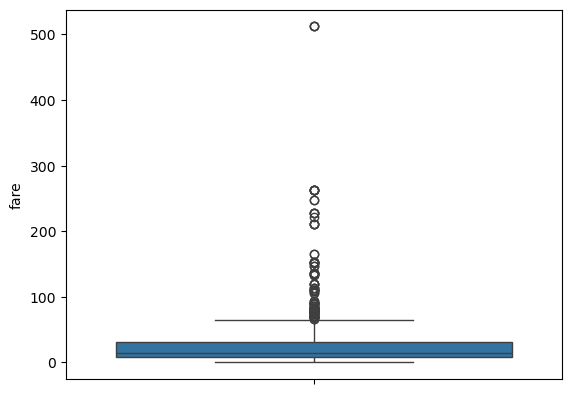

In [33]:
# Visualização de dados por colunas não-categóricas para análise de 'Outliers'.
for coluna in colunas:
    sns.boxplot(df2, y= df2[coluna])
    plt.show()

### Construção do Modelo de Regressão Logística

##### Definição de Conjunto de treino

In [34]:
df_train = df2.copy().sample(frac=0.8)     # Seleção de 80% do dataframe para elaborar um conjunto de treino e contrução do modelo

In [35]:
y_train = df_train['survived']     # Definição da vairável endógena 'survived'

In [36]:
X_train = df_train.iloc[:, 1:]     # Definição das variáveis exógenas do modelo

In [37]:
X_train = sm.add_constant(X_train, prepend= False)     # Adição de constante ao conjunto das variáveis exógenas

##### Definição de conjunto de teste

In [38]:
df_test = df2.copy().drop(df_train.index) # Definição do conjunto de teste

In [39]:
y_test = df_test['survived']    # Definição da variável endógena

In [40]:
X_test = df_test.iloc[:, 1:]      # Definição da variávél exógena

In [41]:
X_test = sm.add_constant(X_test, prepend= False)     # Adição de constante 

##### Contrução de modelo

In [42]:
modelfitted = sm.Logit(y_train, X_train).fit()     # Construção do modelo de regressão logística

Optimization terminated successfully.
         Current function value: 0.421970
         Iterations 7


In [43]:
print(modelfitted.summary())     # Tabela resumo do modelo.

                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  711
Model:                          Logit   Df Residuals:                      703
Method:                           MLE   Df Model:                            7
Date:                Sat, 22 Nov 2025   Pseudo R-squ.:                  0.3644
Time:                        16:24:37   Log-Likelihood:                -300.02
converged:                       True   LL-Null:                       -472.06
Covariance Type:            nonrobust   LLR p-value:                 2.278e-70
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
pclass        -1.1691      0.166     -7.058      0.000      -1.494      -0.844
age           -0.0445      0.009     -4.990      0.000      -0.062      -0.027
sibsp         -0.4785      0.141     -3.394      0.0

In [49]:
matriz_confusao = modelfitted.pred_table()# Tabela confusão do modelo
matriz_confusao

array([[377.,  64.],
       [ 79., 191.]])

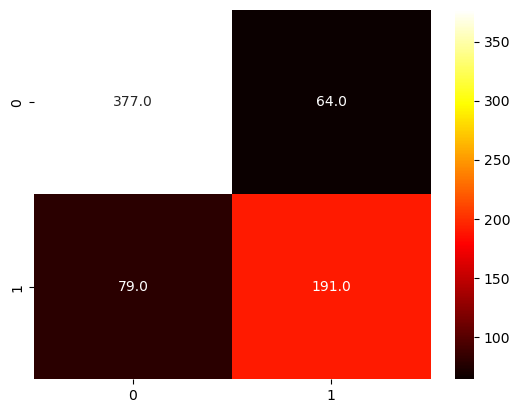

In [70]:
sns.heatmap(matriz_confusao, cmap='hot', annot=True, fmt='')    # Gráfico da matriz confusão
plt.show()

In [46]:
prediction = modelfitted.predict(X_test)     # Construção da resposta através da fórmula de regressão logística com as variáveis exógenas de teste.

In [42]:
pred_0_1 = [1 if p >= 0.5 else 0 for p in prediction]     # Arredondamento do resultado da resposta, para valores com valor igual ou superior a 0.5, assume como 1, para a resposta abaixo de 0.5, assume como 0.  

In [43]:
pd.crosstab(index= y_test, columns= pd.Categorical(pred_0_1), rownames= ['Obs'], colnames= ['Prediction'])     # Contrução de uma tabela para verificar a quantidade de dados previstos que são iguais á variável resposta real. Apenas importam os dados na diagonal principal.

Prediction,0,1
Obs,,
0,87,18
1,18,55


In [44]:
acerto_total = np.mean(y_test == pred_0_1)     # Cálculo da percentagem de acerto para com os dados calculados

In [45]:
print(f'O acerto total foi de {acerto_total*100:.2f}%')

O acerto total foi de 79.78%
